In [1]:
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 2s 0us/step


In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

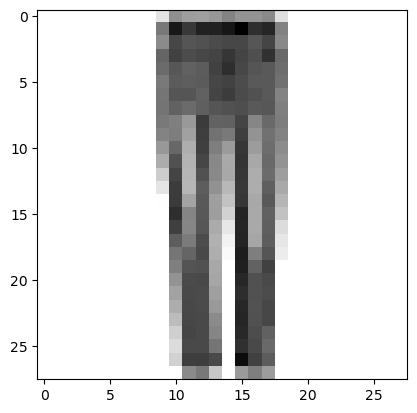

In [21]:
plt.imshow(X_train[90], cmap="binary")
plt.show()

In [23]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [24]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [26]:
class_names[y_train[90]] 

'Trouser'

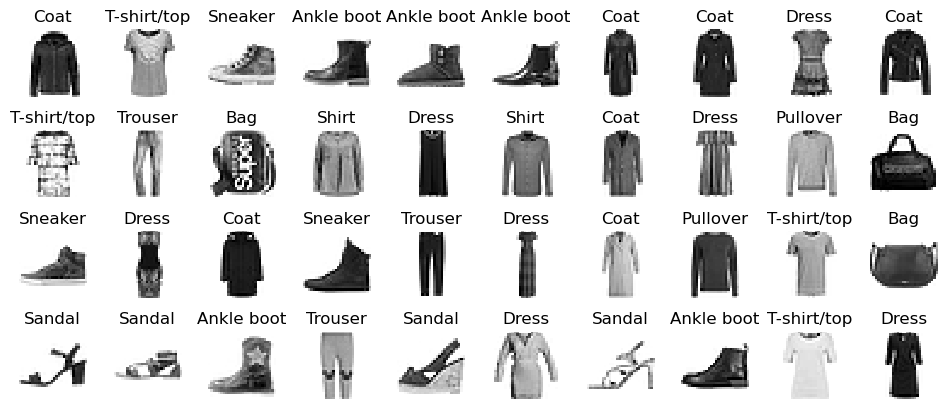

In [10]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [11]:
# Design and build Neural Network to classify the MINST
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=[28, 28], name="input_layer"))
model.add(keras.layers.Flatten(name="1st_layer_flatten"))
model.add(keras.layers.Dense(200, activation="relu", name="2nd_hidden_layer"))
model.add(keras.layers.Dense(100, activation="relu", name="3nd_hidden_layer"))
model.add(keras.layers.Dense(10, activation="softmax", name="Output_layer"))

In [ ]:
model = keras.models.Sequential([
                                keras.layers.Input(shape=[28, 28], name="input_layer"),
                                keras.layers.Flatten(name="1st_layer_flatten"),
                                keras.layers.Dense(200, activation="relu", name="2nd_hidden_layer"),
                                keras.layers.Dense(100, activation="relu", name="3nd_hidden_layer"),
                                keras.layers.Dense(10, activation="softmax", name="Output_layer"),
])

In [28]:
model.summary() 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 1st_layer_flatten (Flatten  (None, 784)               0         
 )                                                               
                                                                 
 2nd_hidden_layer (Dense)    (None, 200)               157000    
                                                                 
 3nd_hidden_layer (Dense)    (None, 100)               20100     
                                                                 
 Output_layer (Dense)        (None, 10)                1010      
                                                                 
Total params: 178110 (695.74 KB)
Trainable params: 178110 (695.74 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
 tf.keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [17]:
#Complie the model
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [18]:
#Train the model
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7375 - accuracy: 0.7550 - val_loss: 0.5310 - val_accuracy: 0.8166
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4971 - accuracy: 0.8265 - val_loss: 0.4577 - val_accuracy: 0.8438
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4471 - accuracy: 0.8435 - val_loss: 0.4252 - val_accuracy: 0.8510
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4199 - accuracy: 0.8525 - val_loss: 0.4081 - val_accuracy: 0.8606
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3991 - accuracy: 0.8596 - val_loss: 0.3883 - val_accuracy: 0.8616
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3825 - accuracy: 0.8647 - val_loss: 0.3705 - val_accuracy: 0.8726
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3694 - accuracy: 0.8687 - val_loss: 0.3566 - val_accuracy:

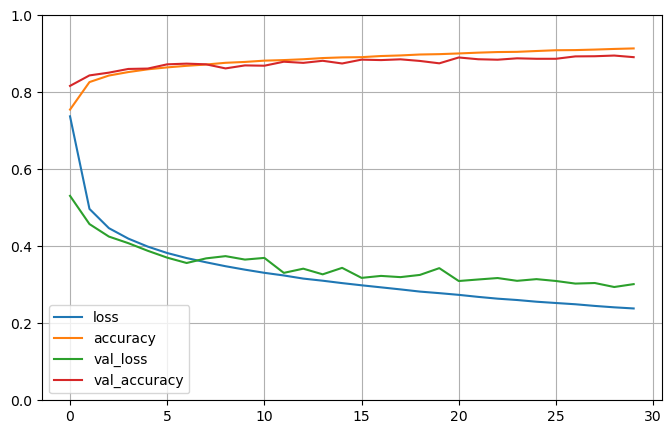

In [20]:
#Plot the learning curve
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()